## Significance Testing

The goal of this notebook is for the student to be able to perform and interpret hypothesis tests using the Scipy and Statsmodels libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

%config InlineBackend.figure_format = 'retina'

### Hypothesis test for $\mu$:
A bottle-filling machine is set to dispense 12.1 fluid ounces into juice bottles. To ensure that the machine is
filling accurately, every hour a worker randomly selects 15 bottles filled by the machine during the past hour
and measures the contents. If there is convincing evidence that the mean amount of juice dispensed is different
from 12.1 ounces or if there is convincing evidence that the standard deviation is greater than 0.05 ounce, the
machine is shut down for recalibration. It can be assumed that the amount of juice that is dispensed into bottles
is normally distributed.

During one hour, the number of fluid ounces of 15 randomly selected bottles was recorded below.

Perform a test of significance to determine whether the mean amount of juice dispensed is different from
12.1 fluid ounces.

#### State the null and alternative hypotheses:

$ H_0 :  \text{$\mu$, the true mean bottle fill for this hour, is equal to 12.1oz} $

$ H_a :  \text{$\mu$, the true mean bottle fill for this hour, is not equal to 12.1oz} $

__or:__


$ H_0 :  \text{$\mu$ = 12.1oz} $

$ H_a :  \text{$\mu$ != 12.1oz} $

Where $\mu$ = the true mean bottle fill for this hour

In [2]:
bottle_sample = [12.33, 11.58, 12.14, 12.13, 11.96, 12.42, 12.0, 11.96, 11.73, 11.94, 11.74, 11.94, 11.66, 11.64, 11.94]

Calculate the T test statistic and the p-value needed for the t-test of significance. You can accomplish this however you like, but it is recommended you use one of the following methods:

`scipy.stats.ttest_1samp` (to use this method, run `from scipy.stats import ttest_1samp`)

`statsmodels.stats.weightstats.DescrStatsW` (to use this method, run `from statsmodels.stats.weightstats import DescrStatsW` and call it directly)

Save the T test statistic to the variable `t_stat` and the p-value to the variable `p_value`.

In [3]:
from scipy.stats import ttest_1samp
t_stat, p_value = ttest_1samp(bottle_sample, 12.1)
print(f"t = {t_stat}, p-value {p_value}")

t = -2.5116779411301042, p-value 0.024898283154919525


In [4]:
from statsmodels.stats.weightstats import DescrStatsW
result = DescrStatsW(bottle_sample)
t_stat, p_value, degrees_freedom = result.ttest_mean(12.1)
print(f"t = {t_stat}, p-value {p_value}")

t = -2.5116779411301033, p-value 0.024898283154919557


#### Visualization
The following code will plot the t-distribution with the proper p-value shaded in __if__ you correctly calculated the `t_stat` variable. It should look like a bell curve with two red tails. You do not need to change this code.

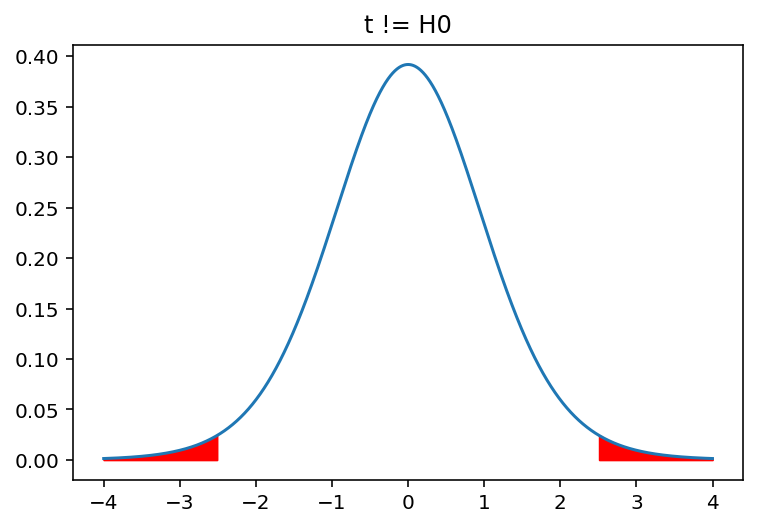

In [5]:
x = np.arange(-4,4,0.001)
y = scipy.stats.t.pdf(x, 14)
z1 = x[x < t_stat]
z2 = x[x > -t_stat]
plt.plot(x, y)
plt.fill_between(z1, 0, scipy.stats.t.pdf(z1, 14), color='r')
plt.fill_between(z2, 0, scipy.stats.t.pdf(z2, 14), color='r')

plt.title('t != H0')
plt.show()

What conclusion would you make at each of the following significance levels?

* α = 0.05
* α = 0.01

Be sure to use the context of the question in stating your conclusions!

__Answer:__

At a significance level of .05, because the p-value .025 is less than .05, we have convincing evidence that the true mean bottle fill for this hour is not equal to 12.1oz. 

At a significance level of .01, because the p-value .025 is greater than .01, we do not have convincing evidence that the true mean bottle fill for this hour is not equal to 12.1oz. 